### Import the necessary packages

In [1]:
from piblin.data import ExperimentSet
from hermes_rheo.file_readers.trios_rheo_txt import TriosRheoReader
from hermes_rheo.transforms.rheo_analysis import RheoAnalysis 
import matplotlib.pyplot as plt 

### Specify the filepath for your data

In [2]:
import os

# Get the current directory where the notebook is located
current_dir = os.path.dirname(os.path.abspath("__file__"))  # Use "__file__" to get the notebook's directory

# Construct the relative path
filepath_creep_dataset = os.path.join(current_dir, 'tutorial_data', 'tutorial_1', 'creep_experiment.txt')
filepath_multi_technique_dataset = os.path.join(current_dir, 'tutorial_data', 'tutorial_1', 'multi_technique.txt')

### Read the file using $piblin$

Here we use the package piblin to read the data and transform them into the piblin dataset format which will allows us to conviniently apply the rheological transforms of hermes.

In [3]:
creep_dataset = ExperimentSet(TriosRheoReader().data_from_filepath(filepath=filepath_creep_dataset, create_composite_datasets=True).measurements)
print(creep_dataset)

ExperimentSet
-------------

Summary
-------
Number of Experiments: 1

Varied Conditions
----------------

index	n_rep	method	Data Types	
0	1	Creep - 1	Temperature(°C)=f(Temperature[°C]) (483 points)	




#### Apply desired $hermes$ pipeline to the experiment

In [4]:
pipeline = RheoAnalysis()
processed_creep_dataset = pipeline(creep_dataset)
print(processed_creep_dataset)

ExperimentSet
-------------

Summary
-------
Number of Experiments: 1

Varied Conditions
----------------

index	n_rep	method	Data Types	
0	1	Creep - 1	strain(%)=f(time[min]) (483 points)	




#### Visualize the processed data

ExperimentSet
-------------

Summary
-------
Number of Experiments: 1

Varied Conditions
----------------

index	n_rep	method	Data Types	
0	1	Creep - 1	strain(%)=f(time[min]) (483 points)	




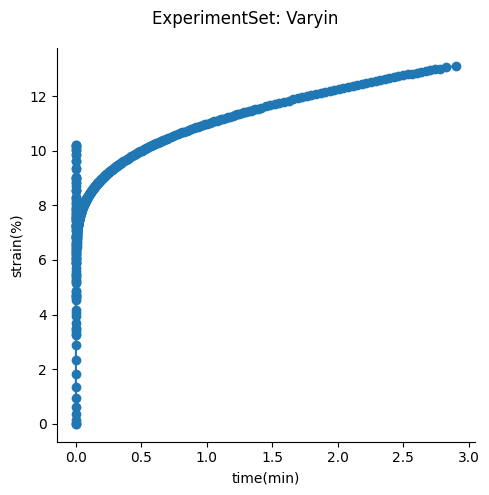

In [5]:
fig_creep, axs_creep = processed_creep_dataset.visualize(expand_replicates=True, marker='o')

#### Read a file with multiple techniques in it

In [6]:
multi_technique_dataset = read_file(filepath=filepath_multi_technique_dataset, create_composite_datasets=True)
pipeline = RheoAnalysis()
processed_multi_technique_dataset = pipeline(multi_technique_dataset)
print(processed_multi_technique_dataset)

NameError: name 'read_file' is not defined

#### Access specific experiment in the dataset

In [ ]:
# index, n_rep, dataset number
amplitude_sweep_experiment = processed_multi_technique_dataset[0][0].datasets[0]
print(amplitude_sweep_experiment)

#### Visualize specific set of data

In [ ]:
fig_sweep, ax_sweep = amplitude_sweep_experiment.visualize(marker='o',linewidth='1', color='red')  
fig_sweep.set_size_inches(6, 4)
ax_sweep.set_xscale('log')
# ax_sweep.set_yscale('log')

#### Access different coordinate in the experiment

In [ ]:
amplitude_sweep_experiment.switch_coordinates(independent_name='step time', dependent_name='loss modulus')
fig3, ax3 = amplitude_sweep_experiment.visualize(marker='o', color='blue')  
fig3.set_size_inches(6, 4)
ax3.set_xscale('log')
ax3.set_yscale('log')

#### Access the independent and dependent variables of the dataset

In [ ]:
loss_modulus = amplitude_sweep_experiment.x_values
step_time = amplitude_sweep_experiment.y_values

print('loss modulus = ',loss_modulus)
print('step time = ',step_time)

#### Access different experiment in the dataset

In [ ]:
frequency_sweep_experiment = processed_multi_technique_dataset[1][0].datasets[0]
flow_ramp_experiment = processed_multi_technique_dataset[2][0].datasets[0]
print(frequency_sweep_experiment)
print(" ")
print(" ")
print(flow_ramp_experiment)

In [ ]:
# Visualize frequency sweep experiment 
fig_freq, ax_freq = frequency_sweep_experiment.visualize(marker='s',linewidth='1', color='black')  
fig_sweep.set_size_inches(6, 4)
ax_freq.set_xscale('log')
ax_freq.set_yscale('log')

# Visualize flow ramp experiment 
fig_flow, ax_flow= flow_ramp_experiment.visualize(marker='^',linewidth='1', color='green')
fig_flow.set_size_inches(6, 4)
ax_flow.set_yscale('log')
ax_flow.set_xscale('log')

#### Reading multiple files in the same directory

In [ ]:
directory_filepath = os.path.join(current_dir, 'tutorial_data', 'tutorial_1',)

experiments = read_directory(directory_filepath, merge_redundant=False)
experiments.detail_to_condition("source_file_name_head");
experiments.split_by_condition_name("source_file_name_head");

In [ ]:
print(experiments)